In [63]:
# Urllib library used to query a website
from urllib.request import urlopen
# BeautifulSoup webscraping module for python
from bs4 import BeautifulSoup
# CSV parser
import csv
# Regular expressions
import re
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import enchant
import wordcloud
from owlready2 import *
import csv
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
us_d = enchant.Dict("en_US")
uk_d = enchant.Dict("en_GB")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kody\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kody\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [64]:
# Process individual case given CELEX number
def scrapeText(url):
    print("Source: " + str(url))
    # Open the page
    judgement_page = urlopen(url)
    # Convert it to BeautifulSoup format 
    soup_judgement_page = BeautifulSoup(judgement_page, "html.parser")
    return soup_judgement_page

In [65]:
def preprocess(text):
    text = text.lower() # lowercase
    text_p = "".join([char for char in text if char not in string.punctuation]) # no punctuation
    text_nonum = re.sub(r'\d+', '', text_p) # no numbers
    words = word_tokenize(text_nonum) # split into tokens (words)
    stop_words = stopwords.words('english')
    stop_words.append('article')
    stop_words.append('eurlex')
    filtered_words = [word for word in words if word not in stop_words] # remove english stopwords
    tokens = []
    for item in filtered_words: # remove all 1 and 2 character words
        if (len(item) > 2):
            tokens.append(item)
    tokens_noduplicates = list(set(tokens)) # remove duplicates
    pos = pos_tag(tokens_noduplicates) # postag text
    dictionary_words = []
    for item in tokens_noduplicates: # remove all non-dictionary words
        if (uk_d.check(item) or us_d.check(item)):
            dictionary_words.append(item)
    return tokens, tokens_noduplicates, dictionary_words, pos

In [66]:
#parsed_page = scrapeText("https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=celex:32017L1132")
parsed_page = scrapeText("https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32019L2121&from=en")

Source: https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32019L2121&from=en


In [67]:
result = preprocess(parsed_page.text)

In [68]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
joined_words = " ".join(result[0])+" "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = [], min_font_size = 10).generate(joined_words) 

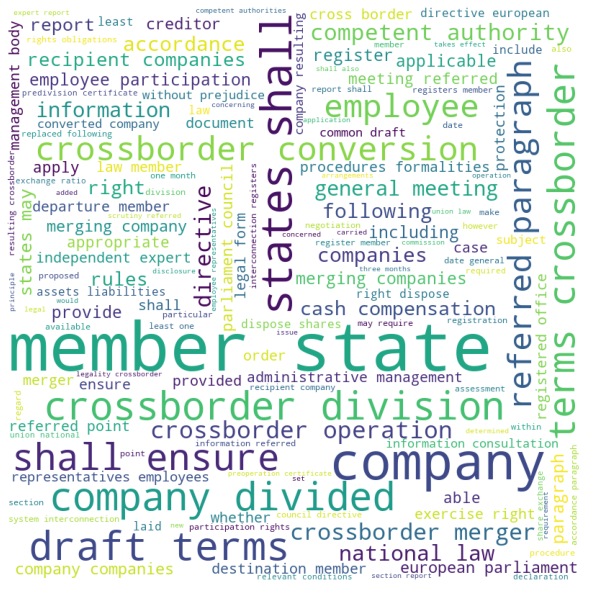

In [69]:
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [70]:
nouns = []
verbs = []
adjectives = []
adverbs = []
all_terms = []

for item in result[3]:
    all_terms.append(item[0])
    if ('NN' in item[1]):
        nouns.append(item)
    if ('VB' in item[1]):
        verbs.append(item)
    if ('JJ' in item[1]):
        adjectives.append(item)
    if ('RB' in item[1]):
        adverbs.append(item)

In [71]:
#print(nouns)

In [72]:
#print(verbs)

In [73]:
#print(adjectives)

In [74]:
#print(adverbs)

In [75]:


onto = get_ontology("https://raw.githubusercontent.com/MaastrichtU-IDS/cbcm-ontology/master/working_copy/eu-cm-ontology.owl").load()

In [76]:
from re import finditer

def camel_case_split(identifier):
    matches = finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

def process(entities):
    newEntities = []
    for e in entities:
        if "org." in str(e):
            tmp = str(e).replace("org.","")
            newEntities.extend(camel_case_split(tmp))
        else:
            tmp = str(e).replace("eu-cm-ontology.","")
            newEntities.extend(camel_case_split(tmp))
    return newEntities

classes = process(list(onto.classes()))
object_properties = process(list(onto.object_properties()))
data_properties = process(list(onto.data_properties()))

ont_entities = []
ont_entities.extend(classes)
ont_entities.extend(object_properties)
ont_entities.extend(data_properties)

In [80]:
def get_matches(ratio, list1, list2):
    matches = {}
    for item1 in list1:
        current_matches = set()
        for item2 in list2:
            similarity = fuzz.ratio(item1, item2)
            if (similarity >= 70 and similarity <= 88):
                current_matches.add(item2)
        if (len(current_matches) > 0):
            matches[item1] = list(current_matches)
    return matches

In [81]:
result = get_matches(90,all_terms,ont_entities)

In [82]:
result

{'prevention': ['Representation'],
 'council': ['Council'],
 'complete': ['Competent'],
 'requiring': ['Acquiring'],
 'decisions': ['Decision'],
 'preconversion': ['Conversion'],
 'representative': ['Representation'],
 'transfer': ['Transfer', 'Transferred'],
 'domestic': ['Domestic'],
 'involved': ['involves'],
 'evaluation': ['Resolution'],
 'shareholders': ['Shareholder', 'Stakeholder'],
 'experts': ['Expert'],
 'implementation': ['Representation'],
 'represent': ['Representation'],
 'publications': ['Publication'],
 'threshold': ['Shareholder'],
 'owners': ['Owner'],
 'involving': ['involves'],
 'certificates': ['Certificate'],
 'account': ['Account'],
 'administrative': ['Administration'],
 'employed': ['Employee'],
 'works': ['Works'],
 'interpretation': ['Representation'],
 'legitimate': ['Ultimate'],
 'action': ['National', 'Transaction'],
 'jurisdiction': ['Acquisition'],
 'provision': ['Division'],
 'another': ['Another'],
 'offices': ['Office'],
 'confirmation': ['Informatio